<h1 align='center' style='color:purple'>Clustering With K Means</h1>

In [77]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [78]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [79]:
df=df.rename(columns={'Income($)':'Income'})
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

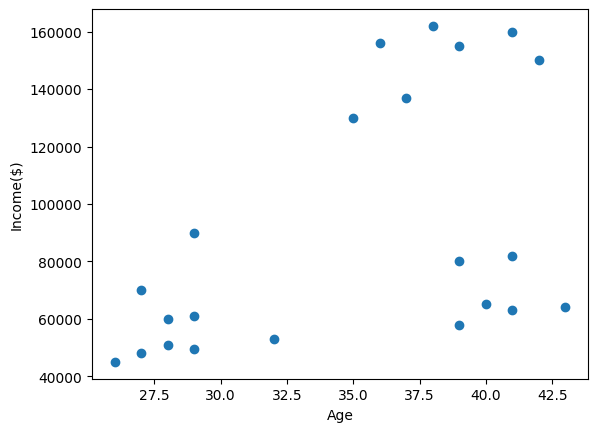

In [60]:
plt.scatter(df.Age,df.Income)
plt.xlabel('Age')
plt.ylabel('Income($)')

From the scatter plot , we can see 3 clusters clearly. 

In [80]:
km=KMeans(n_clusters=3)
km.fit(df[['Age','Income']])

KMeans(n_clusters=3)

In [81]:
y_pred=km.predict(df[['Age','Income']])
y_pred

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [82]:
df['cluster']=y_pred
df

,Name,Age,Income,cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


Here we can see the data points belongs to each clusters (0,1,2)

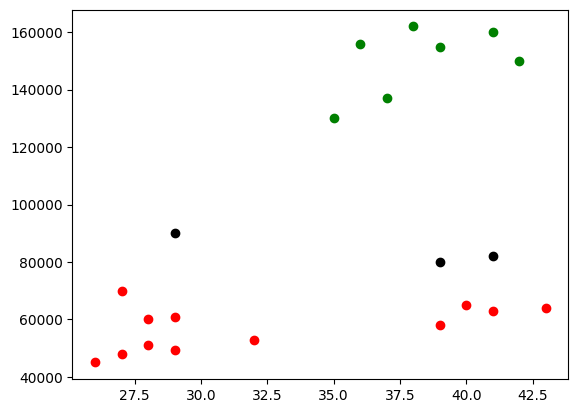

In [83]:
# scatter plot with clusters in different colours
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1.Income,color='green')
plt.scatter(df2.Age,df2.Income,color='red')
plt.scatter(df3.Age,df3.Income,color='black')

In [84]:
#find out the centroids in each cluster
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.24166667e+01, 5.72916667e+04],
       [3.63333333e+01, 8.40000000e+04]])

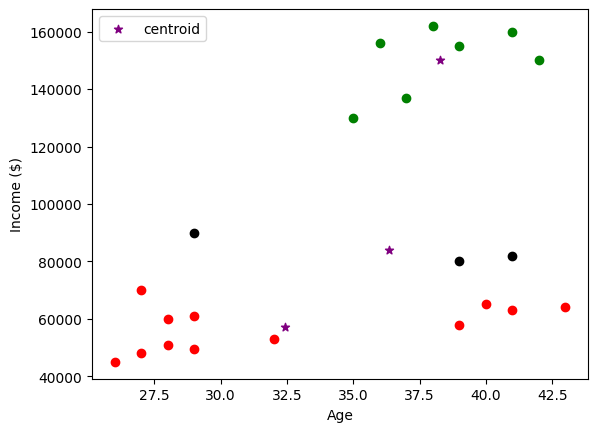

In [85]:
#scatter plot with centroids
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1.Income,color='green')
plt.scatter(df2.Age,df2.Income,color='red')
plt.scatter(df3.Age,df3.Income,color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

It seems the data points are not clustered properly. This may be due to our scaling is not right.
Y axis scaled from 40,000 to 1,60,000 and the range of x axis is pretty narrow.
To handle this, use min max scalar

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [86]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform 'Income' column
df['Income'] = scaler.fit_transform(df[['Income']])

# Fit and transform 'Age' column
df['Age'] = scaler.fit_transform(df[['Age']])

In [87]:
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [88]:
# Apply k means algorithm on this scaled dataset
km1=KMeans(n_clusters=3)
km1_pred=km1.fit_predict(df[['Age','Income']])
km1_pred

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [89]:
df['cluster']=km1_pred
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [90]:
km1.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

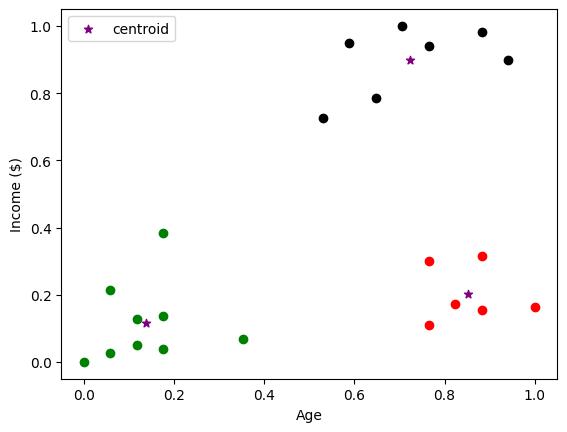

In [91]:
#scatter plot with centroids
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1.Income,color='green')
plt.scatter(df2.Age,df2.Income,color='red')
plt.scatter(df3.Age,df3.Income,color='black')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

Now the data points are clustered correctly.

<h4 style='color:purple'>Elbow Plot</h4>

If there are many clusters, then it is difficult to find out the optimal value of K using the scatter plot.
In this case we can use elbow plot to find K.

In [92]:
wcss= []
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    wcss.append(km.inertia_)

wcss

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.40266726804338093,
 0.2818479744366238,
 0.23415970918410808,
 0.16869711728567788,
 0.14090581089405507,
 0.11436926579512277]

WCSS represents the sum of squared distances between each point and the centroid of its assigned cluster. 'wcss' will contain the WCSS values for each k from 1 to 9. 

Text(0.5, 1.0, 'Elbow Plot')

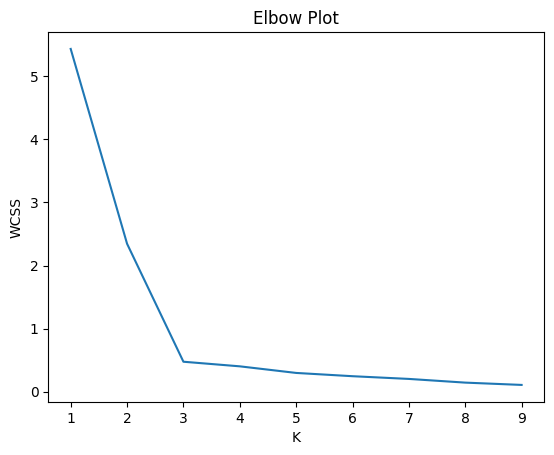

In [74]:
plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(k_rng,wcss)
plt.title('Elbow Plot')

We can see that K=3 from the Elbow plot.

<h4 style='color:purple'>Silhouette Coefficient</h4>

We can use the silhouette score to evaluate the quality of clustering. The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better clustering.

In [93]:
from sklearn.metrics import silhouette_score
s= []
k_rng=range(2,11)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km_pred=km.fit_predict(df[['Age','Income']])
    s.append(silhouette_score(df[['Age', 'Income']], km_pred))

s

[0.5600636053855829,
 0.7129710183539274,
 0.5172057808746886,
 0.40883467046791694,
 0.2713181548840385,
 0.4426670731957817,
 0.26685137325051506,
 0.3256374758795554,
 0.3112399881491106]

These are the silhouette scores for different values of K 

Text(0.5, 1.0, 'Silhouette Score vs. Number of Clusters')

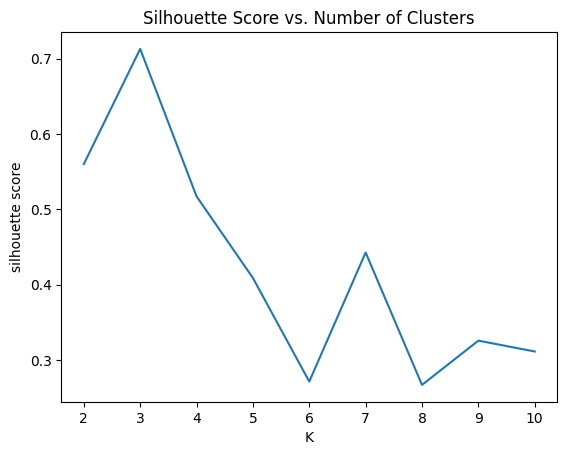

In [94]:
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.plot(k_rng,s)
plt.title('Silhouette Score vs. Number of Clusters')

Highest Silhouette Score: Look for the value of k (number of clusters) that corresponds to the highest silhouette score on the plot. This value indicates the optimal number of clusters according to the silhouette score metric.

Overall Trend: Evaluate the overall trend of the silhouette scores as k increases. Typically, silhouette scores closer to 1 indicate better clustering, while scores closer to 0 or negative values suggest overlapping or poorly defined clusterd.